In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression


In [3]:

os.getcwd()

'/Users/ange-clementakazan/Documents/Github_HS3F/Sequential FeatureForestFlow/Plots_Material'

In [4]:
#Parent directory for the imports
Parent="/Users/ange-clementakazan/Documents/Github_HS3F/Sequential FeatureForestFlow/Plots_Material/" # Change this to your own directory
#HS3F_Rg4
data_Rg4=pd.read_csv("HS3F_Rg4_Results.csv")
#HS3F_Euler
data_Euler=pd.read_csv(Parent+"HS3F_Euler_Results.csv")
#Forest Flow
data_FF=pd.read_csv(Parent+"FFM.csv")
#CS3F_Rg4
Rg4_CS3F=pd.read_csv(Parent+"CS3F_Rg4_Results.csv")
#CS3F_Euler
Euler_CS3F=pd.read_csv(Parent+"CS3F_Euler_Results.csv")

In [55]:
# Function for Plotting the metrics
def plotting_M(data, data1, data2,data3, data4, data5,metric="",method='ALL'):
    # Create a bar plot with two variables side-by-side
    x = np.arange(len(data['dataset']))  # the label locations
    width = 0.15  # the width of the bars
    fig, ax = plt.subplots(figsize=(15, 5))
    bars1 = ax.bar(x - 2*width, data1, width, label=f'HS3F_Rg4 {metric}')
    bars2 = ax.bar(x - width, data2, width, label=f'HS3F_Euler {metric}')
    bars3 = ax.bar(x, data3, width, label=f'Forest flow {metric}')
    bars4 = ax.bar(x + width, data4, width, label=f'CS3F_Rg4 {metric}')
    bars5 = ax.bar(x + 2*width, data5, width, label=f'CS3F_Euler {metric}')

    ax.set_xlabel('Data sets',fontsize=14)
    # ax.set_ylabel('Values',fontsize=14)
    ax.set_ylabel(f'{metric}', color='black',fontsize=14)
    ax.set_title(f'Comparison bar plot',fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(data['dataset'])
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right',fontsize=12)
    plt.yscale('log')
    ax.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))
    # plt.savefig(f"{metric}.png")
    # Adjust layout to make room for rotated labels
    plt.tight_layout()
    plt.show()


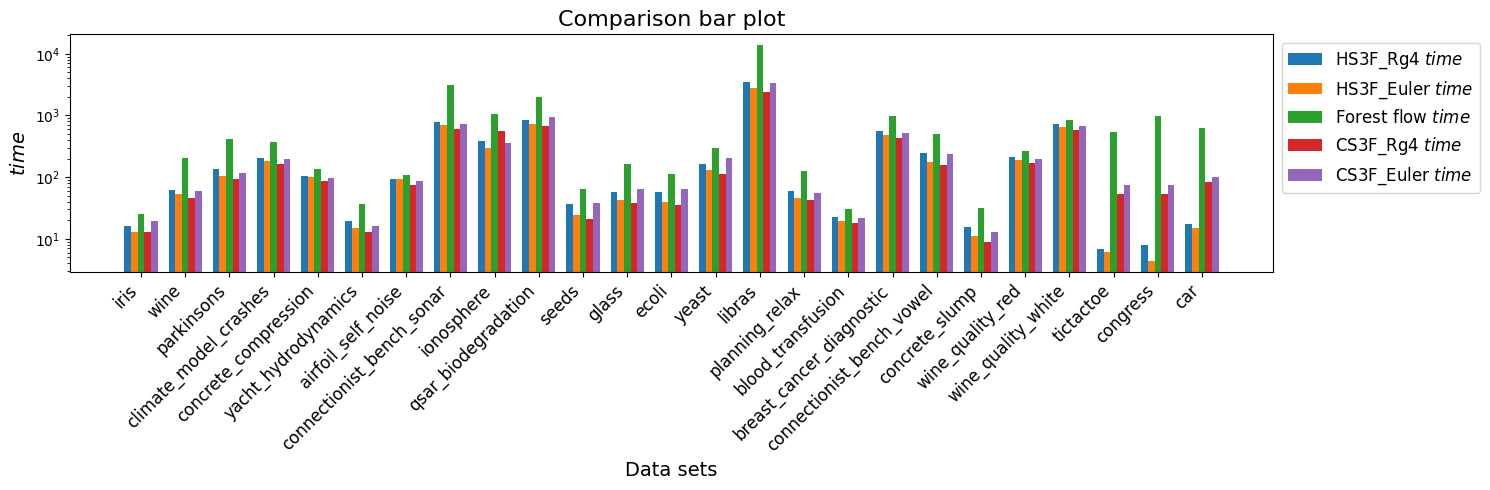

In [56]:
#time plot
plotting_M(data_Euler, data_Rg4['time'], data_Euler['time'],data_FF["time"], Euler_CS3F['time'], Rg4_CS3F['time'],metric='$time$', method='ALL')

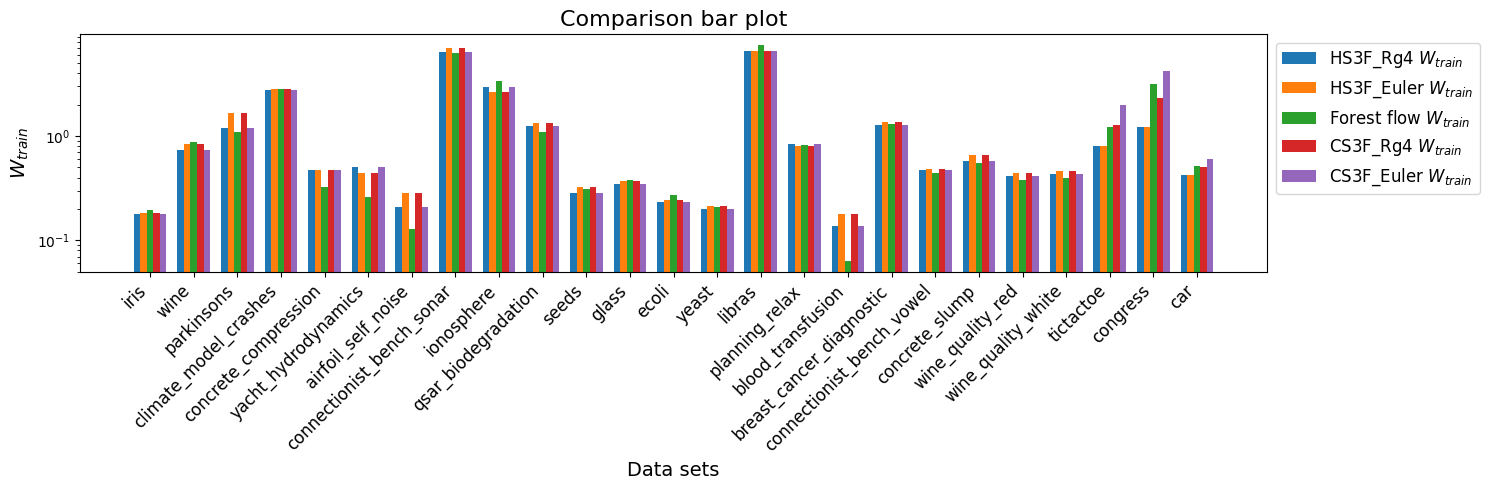

In [57]:
# Wasserstein 1 Distance Train plot
plotting_M(data_Euler, data_Rg4['W_train'], data_Euler['W_train'],data_FF["W_train"], Euler_CS3F['W_train'], Rg4_CS3F['W_train'],metric='$W_{train}$', method='ALL')

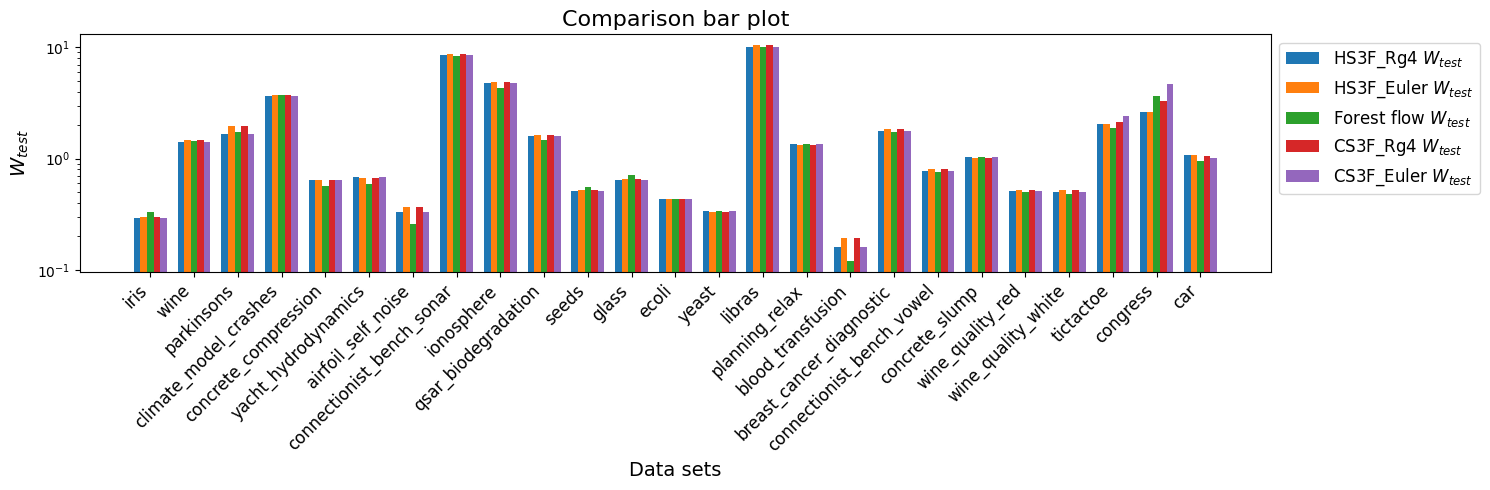

In [60]:
# Wasserstein 1 Distance test plot
plotting_M(data_Euler, data_Rg4['W_test'], data_Euler['W_test'],data_FF["W_test"], Euler_CS3F['W_test'], Rg4_CS3F['W_test'],metric='$W_{test}$', method='ALL')

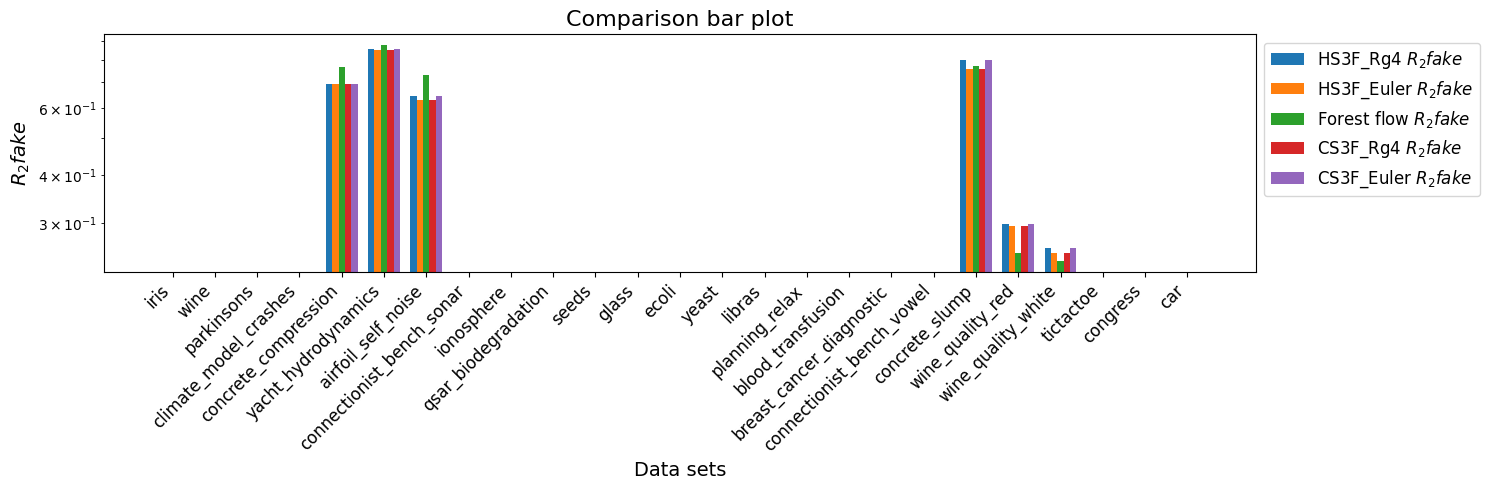

In [61]:
# R squared fake data plot 
plotting_M(data_Euler, data_Rg4["R2_fake"], data_Euler["R2_fake"],data_FF["R2_fake"], Euler_CS3F["R2_fake"], Rg4_CS3F["R2_fake"],metric='$R_2 fake$', method='ALL')

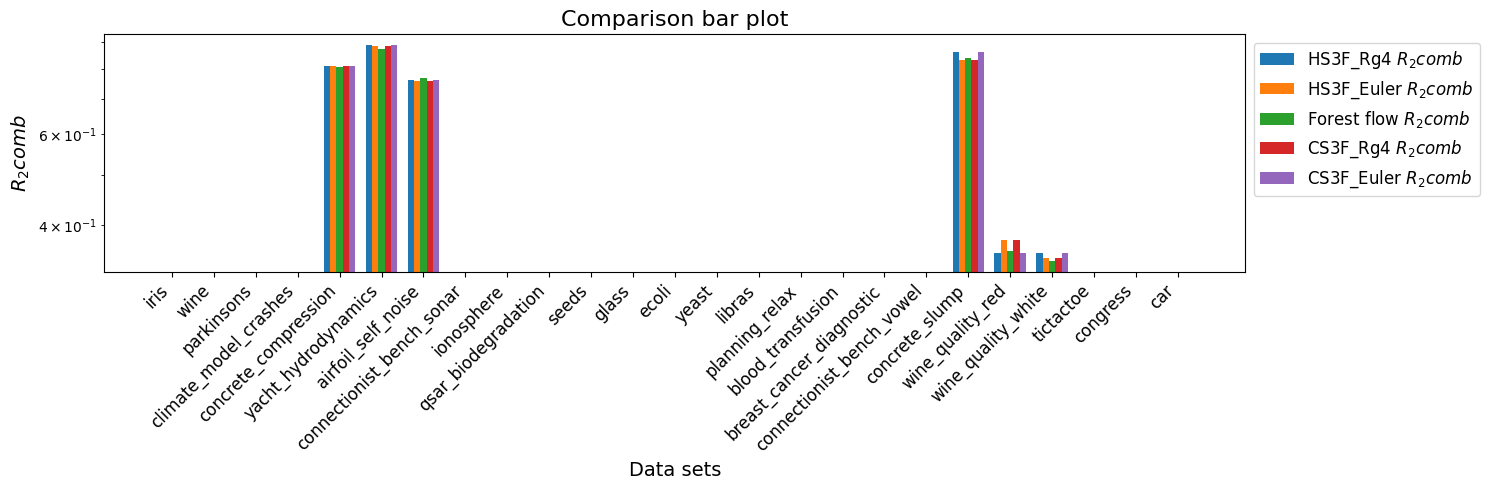

In [104]:
# R squared augmented  data plot 
plotting_M(data_Euler, data_Rg4["R2_comb"], data_Euler["R2_comb"],data_FF["R2_comb"], Euler_CS3F["R2_comb"], Rg4_CS3F["R2_comb"],metric='$R_2 comb$', method='ALL')

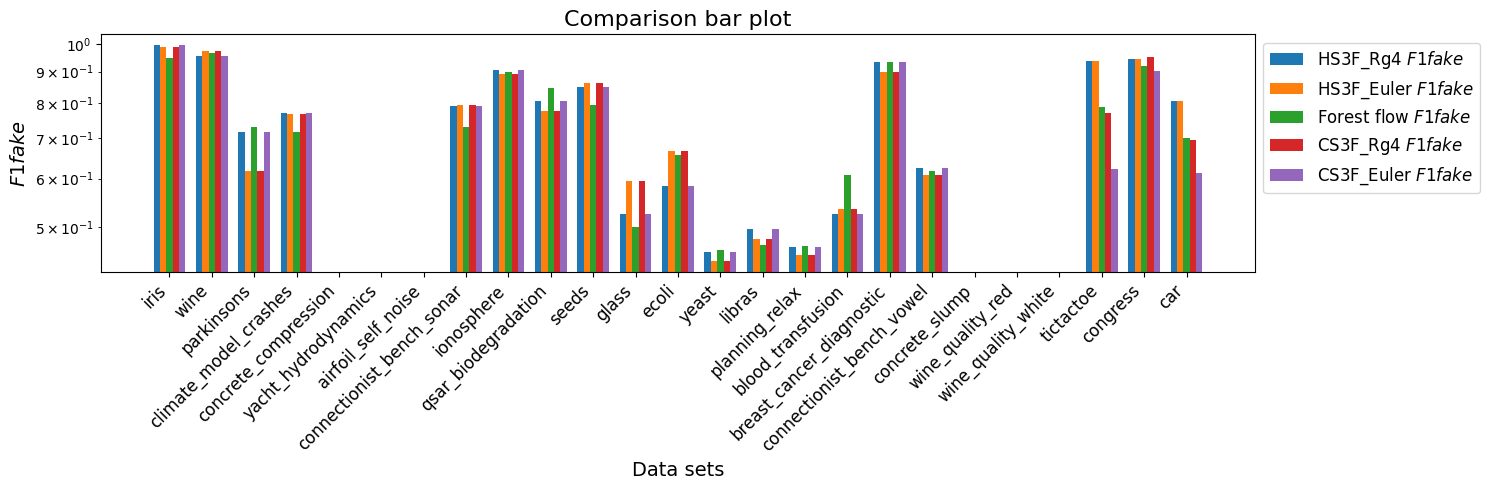

In [63]:
# F1 score  fake data plot 
plotting_M(data_Euler, data_Rg4["F1_fake"], data_Euler["F1_fake"],data_FF["F1_fake"], Euler_CS3F["F1_fake"], Rg4_CS3F["F1_fake"],metric='$F1 fake$', method='ALL')

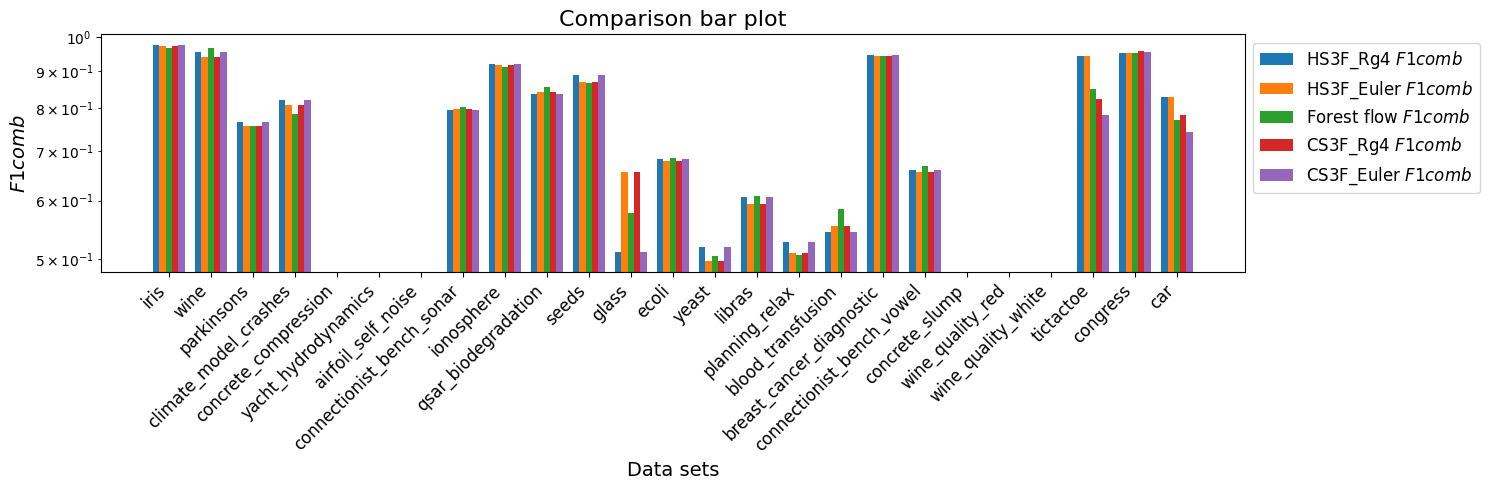

In [65]:
# F1 score  augmented data plot 
plotting_M(data_Euler, data_Rg4["F1_comb"], data_Euler["F1_comb"],data_FF["F1_comb"], Euler_CS3F["F1_comb"], Rg4_CS3F["F1_comb"],metric='$F1 comb$', method='ALL')

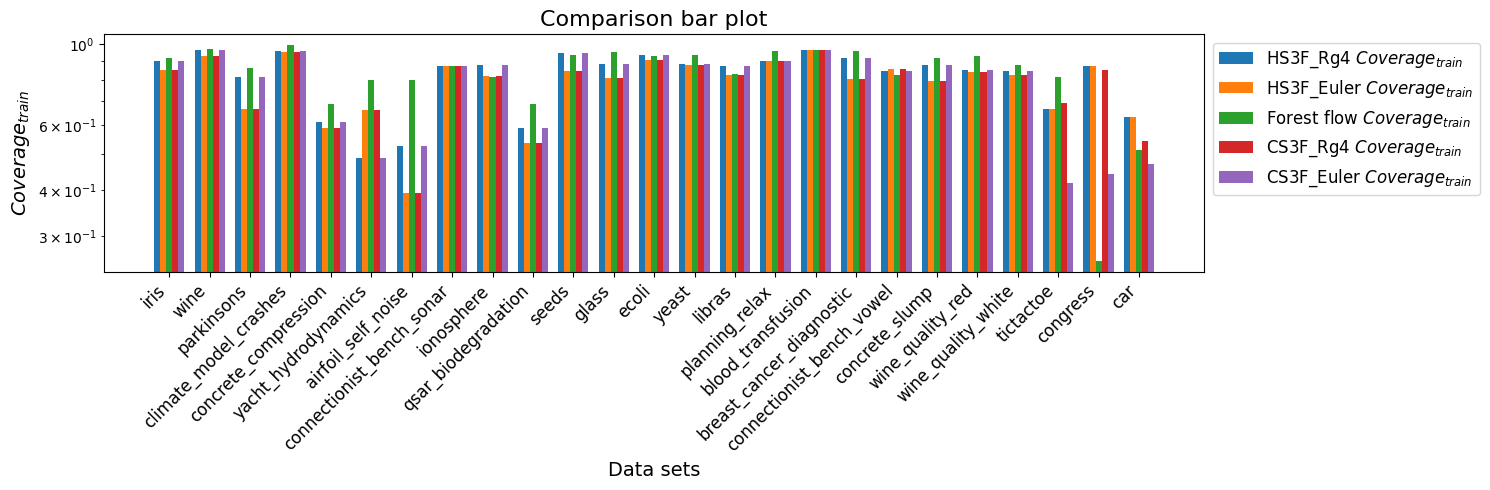

In [66]:
# Coverage training (fake vs original) data plot 
plotting_M(data_Euler, data_Rg4["coverage_train"], data_Euler["coverage_train"],data_FF["coverage_train"], Euler_CS3F["coverage_train"], Rg4_CS3F["coverage_train"],metric='$Coverage_{train}$', method='ALL')

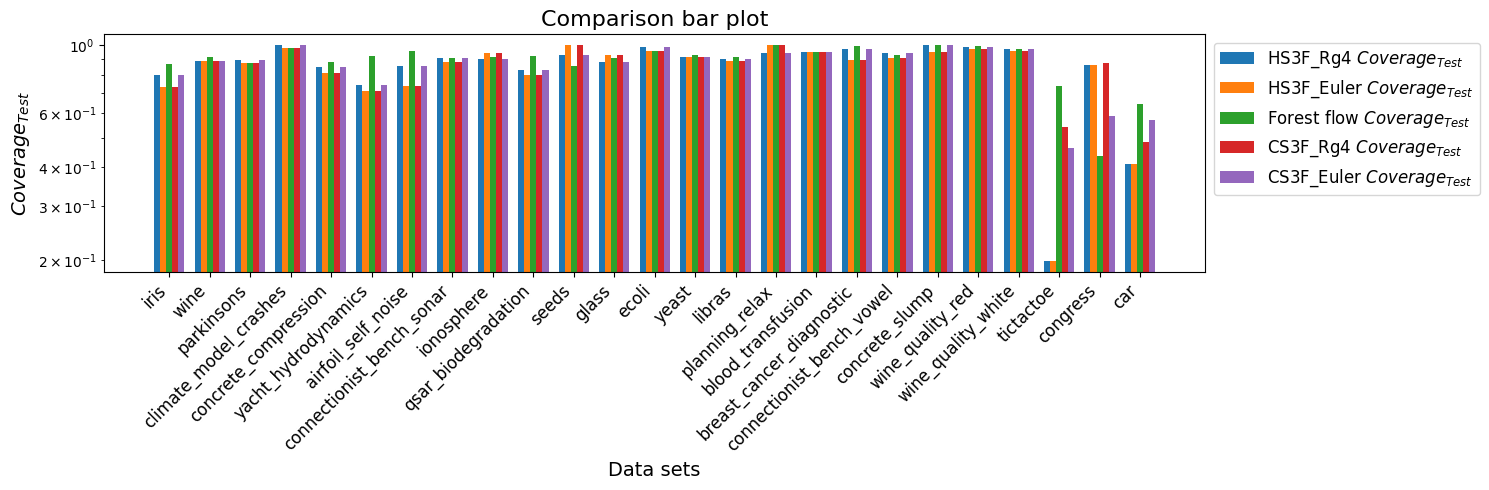

In [67]:
#Coverage test (fake vs original) data plot 
plotting_M(data_Euler, data_Rg4["coverage_test"], data_Euler["coverage_test"],data_FF["coverage_test"], Euler_CS3F["coverage_test"], Rg4_CS3F["coverage_test"],metric='$Coverage_{Test}$', method='ALL')

### Extract results for all the 25 data sets

In [5]:
# columns names needed 
columns_to_average = ["dataset","W_train", "W_test", "R2_real","R2_fake","R2_comb", "F1_real","F1_fake","F1_comb",
    "coverage_train",
    "coverage_test",
    "time"]


In [6]:
Euler_ = data_Euler[columns_to_average]#HS3F
Euler_CS3F_=Euler_CS3F[columns_to_average]#CS3F
#S3F-based Rg4
Rg4_=data_Rg4[columns_to_average]
Rg4_CS3F_=Rg4_CS3F[columns_to_average]
# extract from Forest flow
data_FF=data_FF[columns_to_average]

In [8]:
#Condition for determining the average results  
conditions = {
    "W_train": None, 
    "W_test": None, 
    "R2_real": lambda x: x > 0,
    "R2_fake": lambda x: x > 0,
    "R2_comb": lambda x: x > 0, 
    "F1_real": lambda x: x > 0,
    "F1_fake": lambda x: x > 0,
    "F1_comb": lambda x: x > 0,
    'coverage_train': None,
    'coverage_test': None,
    'time': None

}
def conditional_mean(column, condition):
    if condition is not None:
        return round(column[condition(column)].mean(),6) #({round(column.std(), 2)})
    else:

        return round(column.mean(),6)#({round(column.std(),2)})
# Extract numerical columns
numeric_cols = data_FF.select_dtypes(include=['number']).columns
#### Mean per column names #####
#CS3F_Rg4
Rg4_CS3F_Mean= Rg4_CS3F_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#CS3F_Euler
Euler_CS3F_Mean= Euler_CS3F_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#HS3F_Euler
Euler_Mean= Euler_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#HS3F_Rg4
Rg4_Mean=Rg4_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#Forest_Flow
dt_Feat_flow=data_FF[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))

In [9]:
# Data Frame of results
comparison=pd.DataFrame({"HS3F_Euler_Avg":Euler_Mean.tolist(),"CS3F_Euler_Avg":Euler_CS3F_Mean.tolist(),"HS3F_Rg4_Avg":Rg4_Mean.tolist(),"CS3F_Rg4_Avg":Rg4_CS3F_Mean.tolist(),"Forest Flow_Avg":dt_Feat_flow.tolist() },index=dt_Feat_flow.index).T
comparison

,W_train,W_test,R2_real,R2_fake,R2_comb,F1_real,F1_fake,F1_comb,coverage_train,coverage_test,time
HS3F_Euler_Avg,1.282962,1.949359,0.666715,0.579684,0.667544,0.772106,0.738038,0.774297,0.786984,0.846256,278.424878
CS3F_Euler_Avg,1.348864,1.979609,0.666715,0.579684,0.667544,0.772106,0.723865,0.765855,0.783463,0.863356,262.555560
HS3F_Rg4_Avg,1.232536,1.903448,0.666715,0.591794,0.672308,0.772106,0.740811,0.772581,0.819293,0.860820,331.058229
CS3F_Rg4_Avg,1.405455,1.996807,0.666715,0.591794,0.672308,0.772106,0.711943,0.759726,0.785699,0.866885,332.876717
Forest Flow_Avg,1.355969,1.897578,0.666715,0.606008,0.664661,0.771905,0.722838,0.766319,0.838825,0.894352,1073.765880


In [115]:
comparison.to_latex()

'\\begin{tabular}{lrrrrrrrrrrr}\n\\toprule\n & W_train & W_test & R2_real & R2_fake & R2_comb & F1_real & F1_fake & F1_comb & coverage_train & coverage_test & time \\\\\n\\midrule\nHS3F_Euler_Avg & 1.282960 & 1.949360 & 0.666710 & 0.579680 & 0.667540 & 0.772110 & 0.738040 & 0.774300 & 0.786980 & 0.846260 & 278.424880 \\\\\nHS3F_Rg4_Avg & 1.232540 & 1.903450 & 0.666710 & 0.591790 & 0.672310 & 0.772110 & 0.740810 & 0.772580 & 0.819290 & 0.860820 & 331.058230 \\\\\nCS3F_Rg4_Avg & 1.405450 & 1.996810 & 0.666710 & 0.591790 & 0.672310 & 0.772110 & 0.711940 & 0.759730 & 0.785700 & 0.866890 & 332.876720 \\\\\nCS3F_Euler_Avg & 1.348860 & 1.979610 & 0.666710 & 0.579680 & 0.667540 & 0.772110 & 0.723860 & 0.765850 & 0.783460 & 0.863360 & 262.555560 \\\\\nForest Flow_Avg & 1.355970 & 1.897580 & 0.666710 & 0.606010 & 0.664660 & 0.771900 & 0.722840 & 0.766320 & 0.838820 & 0.894350 & 1073.765880 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Extract categorical (20%) results 

In [76]:

# data sets to extract that contains at least 20% of categorical variables
datasets_with_categorical_variables = [
    "blood_transfusion",
    "congress",
    "car",
    "tictactoe",
    "glass"
]

# Extract columns 
#S3F-based Euler 
Euler_ = data_Euler[data_Euler["dataset"].isin(datasets_with_categorical_variables)][columns_to_average]#HS3F
Euler_CS3F_=Euler_CS3F[Euler_CS3F["dataset"].isin(datasets_with_categorical_variables)][columns_to_average]#CS3F
#S3F-based Rg4
Rg4_=data_Rg4[data_Rg4["dataset"].isin(datasets_with_categorical_variables)][columns_to_average]
Rg4_CS3F_=Rg4_CS3F[Rg4_CS3F["dataset"].isin(datasets_with_categorical_variables)][columns_to_average]
#FFM
# extract from Forest flow
data_FF=data_FF[data_FF["dataset"].isin(datasets_with_categorical_variables)][columns_to_average]

In [77]:
#Condition for determining the average results  
conditions = {
    "W_train": None, 
    "W_test": None, 
    "R2_real": lambda x: x > 0,
    "R2_fake": lambda x: x > 0,
    "R2_comb": lambda x: x > 0, 
    "F1_real": lambda x: x > 0,
    "F1_fake": lambda x: x > 0,
    "F1_comb": lambda x: x > 0,
    'coverage_train': None,
    'coverage_test': None,
    'time': None

}
# We extract the mean conditioned to columns
def conditional_mean(column, condition):
    if condition is not None:
        return round(column[condition(column)].mean(),3) #({round(column.std(), 2)})
    else:

        return round(column.mean(),3)#({round(column.std(),2)})

numeric_cols = data_FF.select_dtypes(include=['number']).columns
#CS3F_Rg4
Rg4_CS3F_Mean= Rg4_CS3F_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#CS3F_Euler
Euler_CS3F_Mean= Euler_CS3F_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#HS3F_Euler
Euler_Mean= Euler_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#HS3F_Rg4
Rg4_Mean=Rg4_[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))
#Forest_Flow
dt_Feat_flow=data_FF[numeric_cols].apply(lambda col: conditional_mean(col, conditions[col.name]))

In [82]:
#Create Dataframe for storing the results for categorical data
comp_cat=pd.DataFrame({"HS3F_Euler_Avg":Euler_Mean.tolist(),"HS3F_Rg4_Avg":Rg4_Mean.tolist(),"CS3F_Rg4_Avg":Rg4_CS3F_Mean.tolist(),"CS3F_Euler_Avg":Euler_CS3F_Mean.tolist(),"Forest Flow_Avg":dt_Feat_flow.tolist() },index=dt_Feat_flow.index).T
comp_cat=comp_cat.drop(["R2_real","R2_fake","R2_comb"], axis=1) # Remove the Regressor Metrics 

In [83]:
comp_cat

,W_train,W_test,F1_real,F1_fake,F1_comb,coverage_train,coverage_test,time
HS3F_Euler_Avg,0.596,1.321,0.775,0.763,0.787,0.788,0.671,17.612
HS3F_Rg4_Avg,0.584,1.313,0.775,0.747,0.756,0.804,0.661,22.494
CS3F_Rg4_Avg,1.448,1.780,0.775,0.637,0.707,0.636,0.692,66.601
CS3F_Euler_Avg,0.926,1.473,0.775,0.709,0.755,0.771,0.756,49.186
Forest Flow_Avg,1.064,1.461,0.775,0.703,0.747,0.700,0.735,468.352


In [120]:
comp_cat.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & W_train & W_test & F1_fake & F1_comb & coverage_train & coverage_test & time \\\\\n\\midrule\nHS3F_Euler_Avg & 0.596380 & 1.321290 & 0.762840 & 0.786910 & 0.788360 & 0.670790 & 17.611790 \\\\\nHS3F_Rg4_Avg & 0.583590 & 1.313420 & 0.746980 & 0.755720 & 0.803900 & 0.661490 & 22.494330 \\\\\nCS3F_Rg4_Avg & 1.448180 & 1.780210 & 0.637280 & 0.706870 & 0.635920 & 0.691810 & 66.601040 \\\\\nCS3F_Euler_Avg & 0.925880 & 1.472530 & 0.708980 & 0.754830 & 0.770750 & 0.756290 & 49.185660 \\\\\nForest Flow_Avg & 1.064200 & 1.460840 & 0.702600 & 0.746970 & 0.699990 & 0.735200 & 468.352480 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [89]:
# # New Initial Conditions
# CS3F_=pd.DataFrame({"CS3F_New_init":new_CS3F.tolist()},index=dt_Feat_flow.index).T
# New_values=pd.DataFrame({"HS3F_New_int":New__HS3F.tolist(),"FF_AVG_New_Init-Cond":nw_ff.tolist() },index=dt_Feat_flow.index).T
# # HS3F_=pd.DataFrame({"HS3F_Euler_Avg":Euler_Mean.tolist(),"HS3F_Rg4_Avg":Rg4_Mean.tolist(),"CS3F_Rg4_Avg":Rg4_CS3F_Mean.tolist(),"CS3F_Euler_Avg":Euler_CS3F_Mean.tolist(),"Forest Flow_Avg":dt_Feat_flow.tolist(),"Stasy_Avg":stasy_,"TabDDM_Avg":TabDDM_  },index=dt_Feat_flow.index).T
# HS3F_=pd.DataFrame({"HS3F_Euler_Avg":Euler_Mean.tolist(),"HS3F_Rg4_Avg":Rg4_Mean.tolist(),"CS3F_Rg4_Avg":Rg4_CS3F_Mean.tolist(),"CS3F_Euler_Avg":Euler_CS3F_Mean.tolist(),"Forest Flow_Avg":dt_Feat_flow.tolist() },index=dt_Feat_flow.index).T
# HS3F_